# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira pretende obter mais informações sobre o perfil de renda dos novos clientes, para a partir disso estabelecer os melhores critérios de limite de crédito, sem que seja necessário afetar a experiência do cliente com solicitações de documentação.

A partir da base de dados coletada de alguns clientes, pretende-se criar um modelo preditivo para renda dos demais clientes.

## Etapa 2 Crisp-DM: Entendimento dos dados

O dicionário abaixo é autoexplicativo e facilita a compreensão de todas as variáveis da base.

### Dicionário de dados

| Variável           | Descrição                                              | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| Unnamed: 0| Variável sem identificação da origem |int64|
| data_ref| Data de referência de coleta das variáveis |object|
| id_cliente| Código de identificação do cliente |int64|
| sexo| Sexo do cliente |object|
| posse_de_veiculo|Indica se o cliente possui veículo | bool |
| posse_de_imovel| Indica se o cliente possui imóvel |bool|
| qtd_filhos| Quantidade de filhos do cliente | int64 |
| tipo_renda | Tipo de renda do cliente | object |
| educacao| Grau de instrução do cliente |object|
| estado_civil | Estado civil do cliente |object|
| tipo_residencia | Tipo de residência do cliente (própria, alugada etc) |object|
| idade |Idade do cliente |int64|
| tempo_emprego| Tempo no emprego atual |float64|
| qt_pessoas_residencia | Quantidade de pessoas que moram na residência |float64|
| renda| Renda em reais |float64|



### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira ação do programa.

In [1]:
# Import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [2]:
# Carregando dados
df = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
# Shape
df.shape

(15000, 15)

In [4]:
# Amostra de dados
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


### Entendimento dos dados - Univariada

In [5]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

### Análise completa gerada pelo Pandas Profiling utilizando o ProfileReport

In [6]:
relatorio = ProfileReport(df, explorative=True, minimal=True, html={'style': {'full_width': True}})
relatorio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- 67,5% dos clientes da base de dados são do sexo Feminino.
- 60,9% não possuem veículo.
- 67,6% possuem imóvel.
- 69,2% não possuem filhos.

### Exportando análise em uma versão html

In [7]:
relatorio.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas

In [8]:
sns.set_theme()

[Text(0.5, 0, 'Idade'), Text(0, 0.5, 'Renda')]

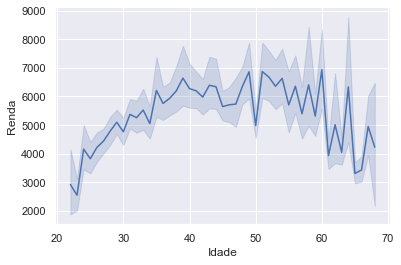

In [9]:
sns.lineplot( x="idade", y="renda", data=df, ci = 95).set(xlabel='Idade',ylabel='Renda')

[Text(0.5, 0, 'Tempo de Emprego'), Text(0, 0.5, 'Renda')]

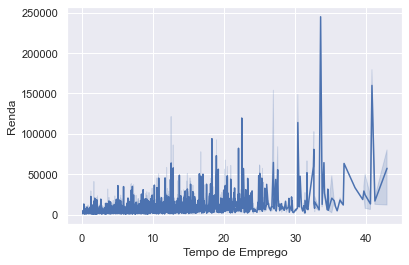

In [10]:
sns.lineplot(x="tempo_emprego", y="renda",
                   data=df, ci = 95).set(xlabel='Tempo de Emprego',ylabel='Renda')

[Text(0.5, 0, 'Quantidade de filhos'), Text(0, 0.5, 'Renda')]

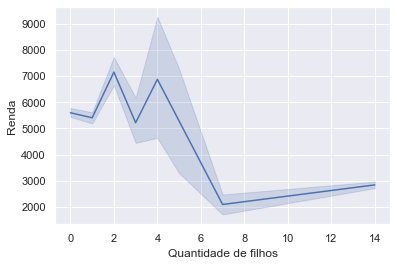

In [11]:
sns.lineplot(x="qtd_filhos", y="renda",
                   data=df, ci = 95).set(xlabel='Quantidade de filhos',ylabel='Renda')

[Text(0.5, 0, 'Qtd. de pessoas que moram na residência'),
 Text(0, 0.5, 'Renda')]

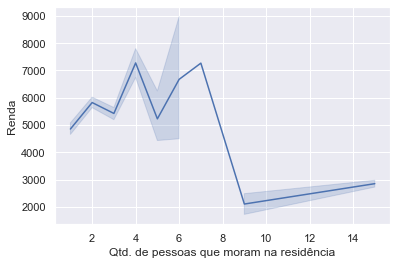

In [12]:
sns.lineplot(x="qt_pessoas_residencia", y="renda",
                   data=df, ci = 95).set(xlabel='Qtd. de pessoas que moram na residência',ylabel='Renda')

[Text(0.5, 0, 'Educação'), Text(0, 0.5, 'Renda')]

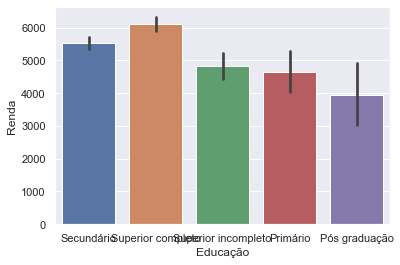

In [13]:
sns.barplot(x="educacao", y="renda",
                   data=df, ci = 95).set(xlabel='Educação',ylabel='Renda')

[Text(0.5, 0, 'educacao'), Text(0, 0.5, 'Renda')]

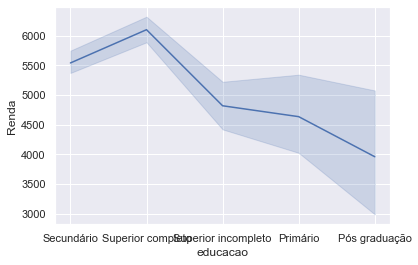

In [14]:
sns.lineplot(x="educacao", y="renda",
                   data=df, ci = 95).set(xlabel='educacao',ylabel='Renda')

[Text(0.5, 0, 'Tipo de Renda'), Text(0, 0.5, 'Renda')]

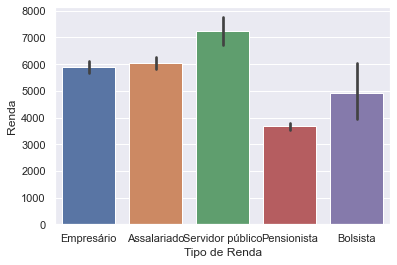

In [15]:
sns.barplot( x="tipo_renda", y="renda",
                   data=df, ci = 95).set(xlabel='Tipo de Renda',ylabel='Renda')

[Text(0.5, 0, 'tipo_renda'), Text(0, 0.5, 'Renda')]

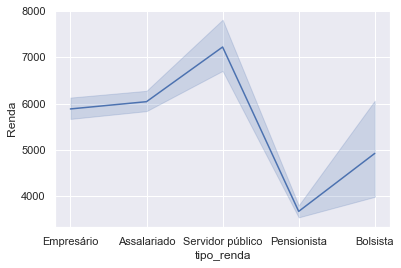

In [16]:
sns.lineplot(x="tipo_renda", y="renda",
                   data=df, ci = 95).set(xlabel='tipo_renda',ylabel='Renda')

[Text(0.5, 0, 'Estado Civil'), Text(0, 0.5, 'Renda')]

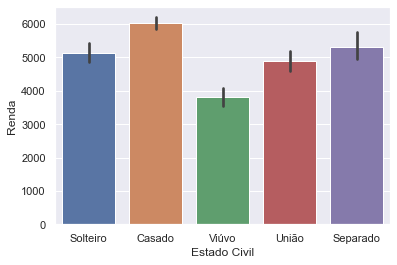

In [17]:
sns.barplot(x="estado_civil", y="renda",
                   data=df, ci = 95).set(xlabel='Estado Civil',ylabel='Renda')

[Text(0.5, 0, 'estado_civil'), Text(0, 0.5, 'Renda')]

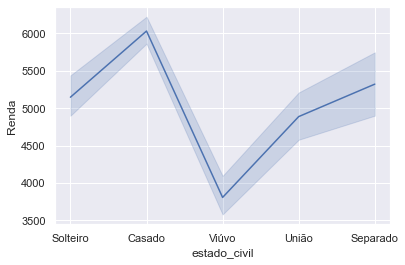

In [18]:
sns.lineplot(x="estado_civil", y="renda",
                   data=df, ci = 95).set(xlabel='estado_civil',ylabel='Renda')

[Text(0.5, 0, 'Tipo de Residência'), Text(0, 0.5, 'Renda')]

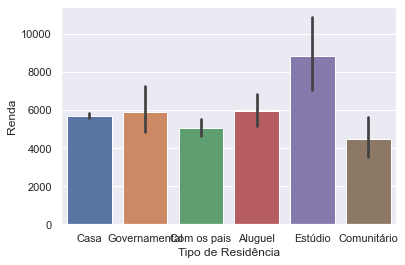

In [19]:
sns.barplot(x="tipo_residencia", y="renda",
                   data=df, ci = 95).set(xlabel='Tipo de Residência',ylabel='Renda')

[Text(0.5, 0, 'Posse de Imóvel'), Text(0, 0.5, 'Renda')]

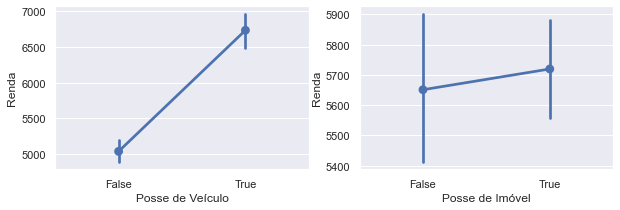

In [20]:
plt.rc('figure', figsize=(10, 3))
fig, axes = plt.subplots(1,2)

sns.pointplot(ax = axes[0], x="posse_de_veiculo", y="renda",
                   data=df, dodge=True, ci = 95).set(xlabel='Posse de Veículo',ylabel='Renda')

sns.pointplot(ax = axes[1], x="posse_de_imovel", y="renda",
                   data=df, dodge=True, ci = 95).set(xlabel='Posse de Imóvel',ylabel='Renda')

- Podemos obser que o indíce de clientes que possuem veículo aumenta conforme a renda também aumenta. 
- Em relação a posse de imóvel já não ocorre tanta alteração.

## Etapa 3 Crisp-DM: Preparação dos dados

Nessa etapa realizamos tipicamente as seguintes operações com os dados:

- **seleção**: Já temos os dados selecionados adequadamente?
- **limpeza**: Precisaremos identificar e tratar dados faltantes
- **construção**: construção de novas variáveis
- **integração**: Temos apenas uma fonte de dados, não é necessário integração
- **formatação**: Os dados já se encontram em formatos úteis?

### Seleção

In [21]:
# Retira algumas variáveis que não serão utilizadas para este projeto.
df_renda = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


### Limpeza

In [22]:
# Verifica se existem dados faltantes
df_renda.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [23]:
# Calcule a mediana da variável "tempo_emprego"
mediana = df_renda['tempo_emprego'].median()

# Substitua os valores ausentes pela mediana
df_renda['tempo_emprego'] = df_renda['tempo_emprego'].fillna(mediana)

In [24]:
# Verifica se existem dados faltantes
df_renda.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Tratando dados duplicados

In [25]:
df_renda = df_renda.drop_duplicates()
df_renda = df_renda.reset_index(drop=True)
print(df_renda.shape)
print("")
print(df_renda.info())

(10447, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   tempo_emprego          10447 non-null  float64
 10  qt_pessoas_residencia  10447 non-null  float64
 11  renda                  10447 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 836.7+ KB
None


## Etapa 4 Crisp-DM: Modelagem

Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo

### Será utilizado a "árvore de regressão" 

Para isso será necessário binarizar oas variáveis qualitativas.
Vamos utilizar o get_dummies para realizar essa binarização.

In [26]:
df_renda = pd.get_dummies(df_renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()
df_renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                             uint8
tipo_renda_Bolsista                uint8
tipo_renda_Empresário              uint8
tipo_renda_Pensionista             uint8
tipo_renda_Servidor público        uint8
educacao_Pós graduação             uint8
educacao_Secundário                uint8
educacao_Superior completo         uint8
educacao_Superior incompleto       uint8
estado_civil_Separado              uint8
estado_civil_Solteiro              uint8
estado_civil_União                 uint8
estado_civil_Viúvo                 uint8
tipo_residencia_Casa               uint8
tipo_residencia_Com os pais        uint8
tipo_residencia_Comunitário        uint8
tipo_residencia_Estúdio            uint8
tipo_residencia_

In [27]:
# Separando variáveis explicativas e variável resposta
X = df_renda.drop(['renda'], axis=1).copy()
y = df_renda['renda']

In [28]:
# Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [29]:
# Treinando duas árvores de regressão com profundidades diferentes
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_test, y_test)
regr_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [30]:
mse1 = regr_1.score(X_test, y_test)
mse2 = regr_2.score(X_test, y_test)

template = "O R-quadrado da árvore com profundidade {0} é: {1:.2f}"

print(template.format(regr_1.get_depth(), mse1).replace(".", ","))
print(template.format(regr_2.get_depth(), mse2).replace(".", ","))

O R-quadrado da árvore com profundidade 2 é: 0,32
O R-quadrado da árvore com profundidade 8 é: 0,73


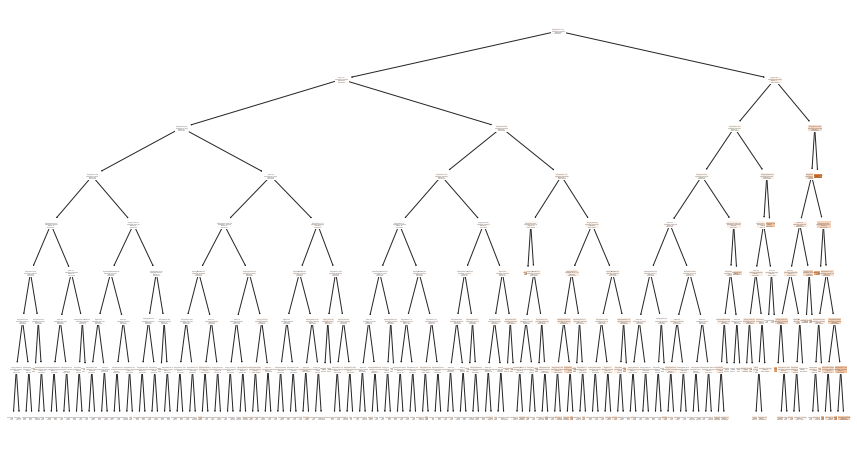

In [31]:
plt.rc('figure', figsize=(15, 8))
tp = tree.plot_tree(regr_2,
                    feature_names=X_test.columns,
                    filled=True)

In [32]:
# Pré poda da melhor árvore

regr_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
regr_2.fit(X_train, y_train)
mse1 = regr_2.score(X_test, y_test)
mse1

0.3614392505838562

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.297172,0.297172,0.297172,0.297172,0.297172,0.297172,0.297172,0.297172
3,0.350727,0.350727,0.395562,0.395562,0.395562,0.395562,0.395562,0.395562
4,0.357592,0.351823,0.370274,0.371431,0.389366,0.389366,0.389366,0.389366
5,0.326760,0.320382,0.365310,0.366467,0.384402,0.388471,0.388471,0.387584
6,0.244724,0.271520,0.346368,0.350208,0.371090,0.380243,0.380809,0.394917
7,0.249549,0.285854,0.339101,0.338692,0.368531,0.377669,0.378373,0.394067
8,0.263337,0.281622,0.328235,0.328581,0.353978,0.371193,0.371930,0.386576


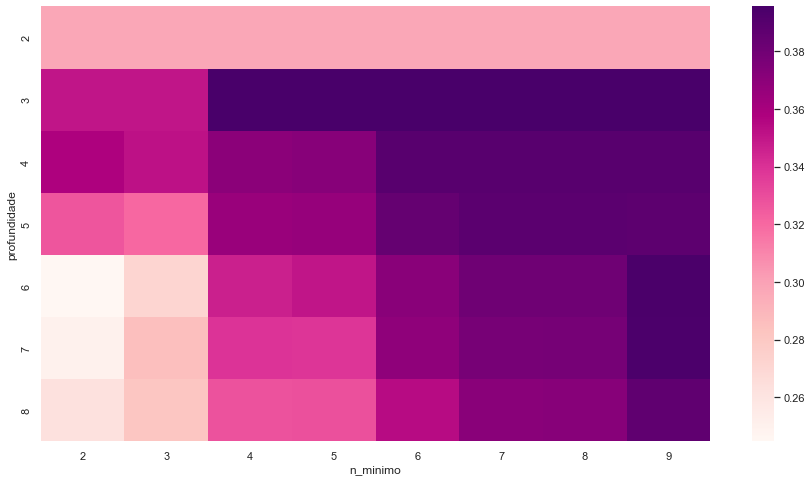

In [33]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_2.fit(X_train, y_train)
        mse1 = regr_2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'), cmap="RdPu")
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [34]:
path = regr_2.cost_complexity_pruning_path(X_test, y_test)
path

{'ccp_alphas': array([0.00000000e+00, 1.04906499e+03, 3.41710465e+03, 3.91424341e+03,
        4.07154343e+03, 4.37291084e+03, 4.51534601e+03, 4.91362611e+03,
        4.98285640e+03, 5.11235569e+03, 5.68818070e+03, 6.07926529e+03,
        6.84765522e+03, 6.90011574e+03, 7.82482829e+03, 8.17256399e+03,
        8.22132815e+03, 8.51393927e+03, 8.65293207e+03, 9.12277121e+03,
        9.90729292e+03, 1.05280317e+04, 1.07306664e+04, 1.13999077e+04,
        1.14856299e+04, 1.21460851e+04, 1.28041250e+04, 1.31232228e+04,
        1.41094211e+04, 1.75443370e+04, 1.82560265e+04, 1.82824778e+04,
        2.02158767e+04, 2.11151077e+04, 2.13875334e+04, 2.20815180e+04,
        2.58104640e+04, 2.65290079e+04, 3.13117706e+04, 3.27636559e+04,
        3.48214202e+04, 3.88258059e+04, 4.00809728e+04, 4.29962448e+04,
        5.21506548e+04, 5.50304975e+04, 5.85317249e+04, 6.35111898e+04,
        6.37702616e+04, 7.23858283e+04, 7.62039198e+04, 7.97889801e+04,
        1.00566915e+05, 1.02961040e+05, 1.10595398

Text(0, 0.5, 'Impureza total das folhas')

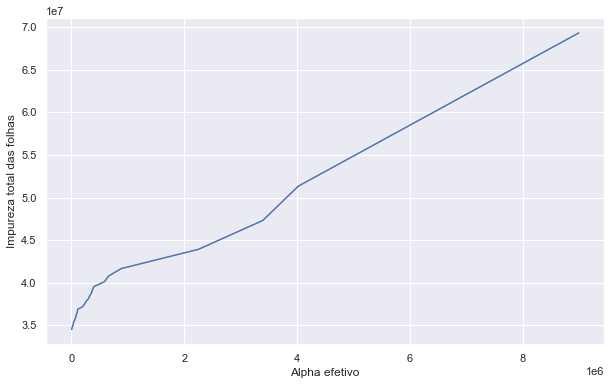

In [35]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [36]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)
    clfs.append(clf)

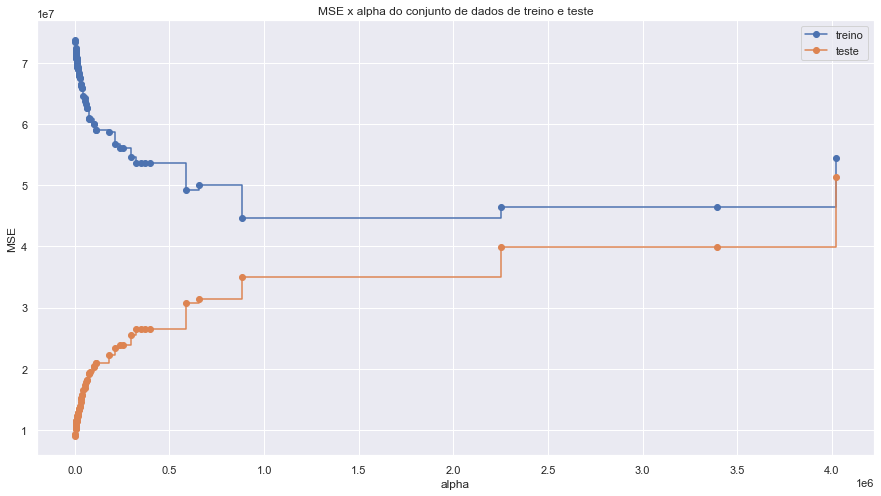

In [37]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados

In [38]:
print(f"R² de treino é: {regr_2.score(X_train, y_train)*100:.2f}%")
print(f"R² de teste é: {regr_2.score(X_test, y_test)*100:.2f}%")

R² de treino é: 51.39%
R² de teste é: 38.66%


## Etapa 6 Crisp-DM: Implantação

Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.